In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
# two helper functions
from HelperFunctions import TestModels,PlotModel,envelope,hist
from tqdm import tqdm

- hypercube axes ${\bf V}=[{\bf v}_1,\dots]\in\mathbb{R}^{R\times P}$, bounds ${\bf B}_0,{\bf B}_0+\Delta{\bf B}$ 

- Uniform random numbers 

    $${\bf u}=[{\rm u}_1,\dots]\in[0,1]^R$$ 



- Test output reads, using $s_r=\{-1,+1\}$ to contain sign of term multiplying ${\rm u}_r$:

    $${\rm y}={\bf B}_0{\bf V}{\bf X}+{\bf u}\Delta{\bf B}_r{\bf v}_r^\top{\bf X}
    ={\bf B}_0{\bf V}{\bf X}+\sum_r{\rm s}_r{\rm u}_r|\Delta{\rm B}_r{\bf v}_r^\top{\bf X}|$$
    

- The lower bounds then simply correspond to ${\rm u}_r=0/1$ for ${\rm s}_r=+1/-1$ and vice versa:

    $${\rm y}\geq{\bf B}_0{\bf V}{\bf X}-
    \sum_{r,{\rm s}_r=-1}|\Delta{\rm B}_r{\bf v}_r^\top{\bf X}|$$

    $${\rm y}\leq{\bf B}_0{\bf V}{\bf X}+
    \sum_{r,{\rm s}_r=+1}|\Delta{\rm B}_r{\bf v}_r^\top{\bf X}|$$




$$
\langle\Delta{\rm u}_r\rangle
=
\int_{-1/2}^{1/2}x{\rm d}x = 1/8 - 1/8=0
$$
$$
\langle\Delta{\rm u}_r\Delta{\rm u}_s\rangle
=
\delta_{rs}\int_{-1/2}^{1/2}x^2{\rm d}x = 2 (1/2)^3 / 3 = 1/12
$$

- For the variance, use ${\bf u}=0.5{\bf1} + \Delta{\bf u}$
    $$\langle{\rm y}\rangle_\mathcal{H}={\bf B}_0{\bf V}{\bf X}+0.5{\bf1}\Delta{\bf B}{\bf V}^\top{\bf X}$$
    $${\rm y}=\langle{\rm y}\rangle_\mathcal{H} + \sum_r\Delta{\rm u}_r \Delta{\rm B}_r{\bf v}_r^\top{\bf X}$$
    $$\langle{\rm u}_r{\rm u}_s\rangle_\mathcal{H}-1/4 = \delta_{rs}/12$$
    $$\langle{\rm y}^2\rangle_\mathcal{H}-\langle{\rm y}\rangle_\mathcal{H}^2
    =\sum_r(\Delta{\rm B}_r{\bf v}_r^\top{\bf X})^2/12$$

$$\langle{\rm y}^2\rangle_\mathcal{H}-\langle{\rm y}\rangle_\mathcal{H}^2
    =\sum_r(\Delta{\rm B}_r{\bf v}_r^\top{\bf X})^2/12$$
    
    

The variance 
- hypercube axes ${\bf V}=[{\bf v}_1,\dots]\in\mathbb{R}^{R\times P}$, bounds ${\bf B}_0,{\bf B}_0+\Delta{\bf B}$ 

- Uniform random numbers 

    $${\bf u}=[{\rm u}_1,\dots]\in[0,1]^R$$ 



- Test output reads, using $s_r=\{-1,+1\}$ to contain sign of term multiplying ${\rm u}_r$:

    $${\rm y}={\bf B}_0{\bf V}{\bf X}+\sum_r{\rm s}_r{\rm u}_r|\Delta{\rm B}_r{\bf v}_r^\top{\bf X}|$$
    

- The lower bounds then simply correspond to ${\rm u}_r=0/1$ for ${\rm s}_r=+1/-1$ and vice versa:

    $${\rm y}\geq{\bf B}_0{\bf V}{\bf X}-
    \sum_{r,{\rm s}_r=-1}|\Delta{\rm B}_r{\bf v}_r^\top{\bf X}|$$

    $${\rm y}\leq{\bf B}_0{\bf V}{\bf X}+
    \sum_{r,{\rm s}_r=+1}|\Delta{\rm B}_r{\bf v}_r^\top{\bf X}|$$

44.6
19.1
30.95
32.824999999999996


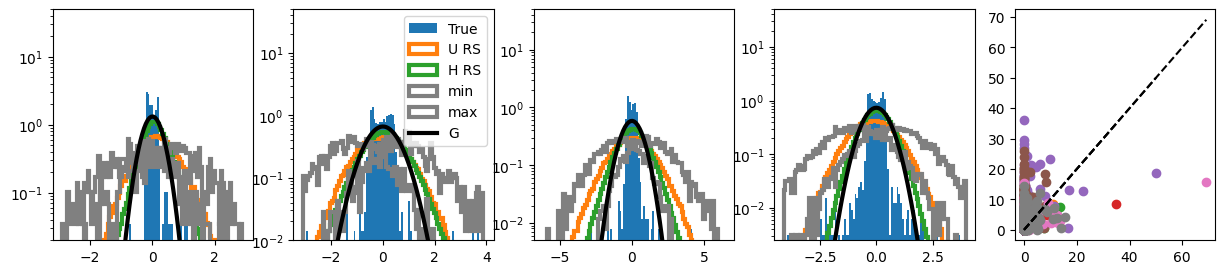

In [4]:
fig,axs = plt.subplots(1,5,figsize=(15,3),sharey=False)
for i,P in enumerate([10,20,40,80]):
    res = TestModels(N_train=P*50,
                    N_test=P*50,
                    P=P,
                    seed=1234,
                    model='cubic',
                    noise=0.001
                    )
    X = res['X_TEST']
    y = res['Y_TEST']

    y_mle = X@res['Theta_LST_SQ']
    errors = y-y_mle

    y_min,y_max = res['HYPERCUBE_FACE_BOUND_FN'](X)

    print(np.where(errors>0,y_max<y,y_min>y).mean()*100.)

    #y_min = (X@res['HYPERCUBE_SAMPLES'].T).min(1)
    #y_max = (X@res['HYPERCUBE_SAMPLES'].T).max(1)

    y_rs = (X@res['HYPERCUBE_SAMPLES'].T - y_mle[:,None]).flatten()
    
    y_u = (np.random.uniform(low=y_min,high=y_max,size=(100,y_mle.size)) - y_mle[None,:]).flatten()

    

    
    
    
    bins = np.linspace((y_min-y_mle).min(),(y_max-y_mle).max(),101)
    axs[i].hist(errors,bins=bins,density=True,lw=2,label='True')[1]


    # max/min uniform
    axs[i].hist(y_u,density=True,histtype='step',bins=bins,lw=3,label='U RS')
    # hypercube sample
    axs[i].hist(y_rs,density=True,histtype='step',bins=bins,lw=3,label='H RS')
    axs[i].hist(y_min,density=True,histtype='step',bins=bins,lw=3,label='min',color='0.5')
    axs[i].hist(y_max,density=True,histtype='step',bins=bins,lw=3,label='max',color='0.5')
    
    ## normal range
    #axs[i].hist(y_m,density=True,histtype='step',bins=bins,lw=2)

    y_H = np.exp(-bins**2/2.0/(X@res['HYPERCUBE_VARIANCE']*X).sum(1).mean())
    y_H /= (y_H*np.gradient(bins)).sum()
    axs[i].plot(bins,y_H,'k-',lw=3,label='G')
    axs[i].set_yscale("log")
    axs[i].set_ylim(10./P/50.,50.0)
    
    line = np.linspace((errors**2).min(),(errors**2).max(),11)
    axs[-1].plot(line,line,'k--')
    axs[-1].scatter((errors**2)[errors>0],((y_max-y_mle)**2)[errors>0])
    axs[-1].scatter((errors**2)[errors<0],((y_min-y_mle)**2)[errors<0])

    #plt.show()

    #print(vv/errors.var(),vv2/errors.var())
axs[1].legend()


(10000,)


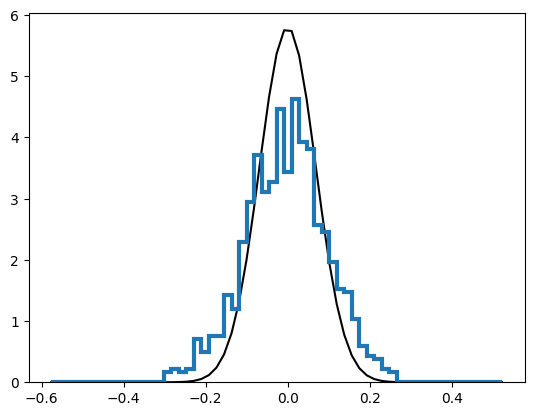

In [102]:

#u_G = np.random.normal(size=(10,X.shape[1]))
#y_G = (u_G@np.diag(np.sqrt(nu))@V@X.T).flatten()


print(y_G.shape)


y_rs = X@res['HYPERCUBE_SAMPLES'].T

#ry_rs = np.random.uniform(low=y_min,high=y_max,size=(y_max.size,))
errors = y-y_mle
bins = np.linspace(errors.min()*2.0,errors.max()*2.0,61)

y_H = np.exp(-bins**2/2.0/vv)
y_H /= (y_H*np.gradient(bins)).sum()

plt.plot(bins,y_H,'k-')
hist = lambda y : \
    plt.hist(y,bins=bins,density=True,cumulative=False,lw=3,histtype='step');
hist(y-y_mle);
#hist(y_G);
#hist((y_rs-y_mle[:,None]).flatten());

1.1158518853570423
1.0296274637151348
1.0766472925532067
1.1767324875816891
1.1425794947871264
1.1136404276693717
0.9311901411787331
1.0796972868496524
1.1540470598379453
1.0321375081952282
[ 3.98748198 -2.41516001]


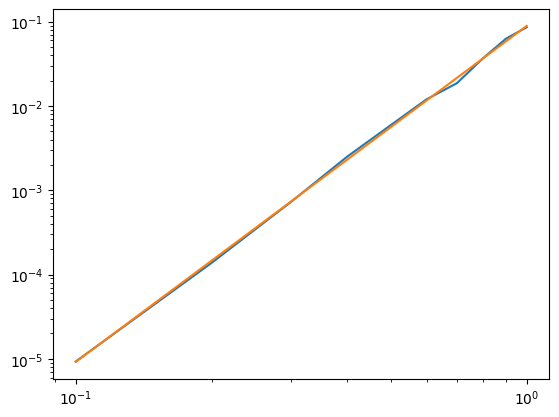

In [75]:
s=0.5
v = []
s_a = np.linspace(0.1,1.0,10)
for s in s_a:
    #for D in [5,10,15,20,35,40,100]:
    D = 40
    rsq = (np.random.uniform(low=-s,high=s,size=(1000,D))**2).sum(1)
    v+= [np.var(rsq)/D]
    print(np.var(rsq)/D/s**4 * 12.0)

plt.loglog(s_a,v);
X = np.array([np.log(s_a),np.ones(s_a.size)]).T
lstsq = \
    np.linalg.lstsq(X,\
        np.log(np.array(v)),rcond=-1)[0]
print(lstsq)

plt.loglog(np.linspace(0.1,1.0,10),np.exp(X@lstsq))


#plt.hist(rsq,bins=30);


In [56]:
bins = np.linspace(min_errors.min(),max_errors.max(),101)
counts = np.zeros_like(bins)
for y_maxmin in tqdm(zip(max_errors,min_errors)):
    sel = (bins>=y_maxmin[1])*(bins<=y_maxmin[0])
    counts[sel] += 1.0
counts /= counts.sum()

100it [00:00, 215534.64it/s]


(2000, 2000) (1000,)


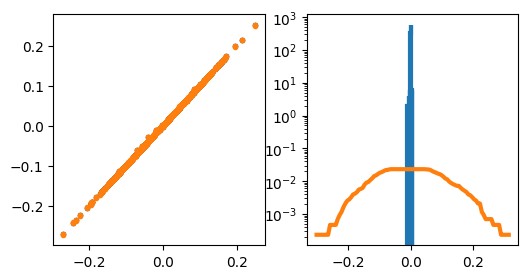

In [57]:
fig,axs = plt.subplots(1,2,figsize=(6,3))
print(y_samples.shape,y.shape)
axs[0].plot(y,y_mle,'k.')
axs[0].plot(y,y_max,'C1.')
axs[0].plot(y,y_min,'C1.')
cb=axs[1].hist(errors,bins=30,density=True,log=True,lw=3,histtype='step');
axs[1].plot(bins,counts,lw=3)


In [2]:
def EnvelopeTest(P=10,N=100,model='random',noise=0.0,\
                 seed=np.random.randint(1000)):
    res = TestModels(N_train=N,
                 N_test=N//P,
                 P=P,
                 seed=seed,
                 model=model,
                 noise=noise 
                 )
    mean = res['X_TEST']@res['Theta_LST_SQ']
    errors = res['Y_TEST'] - mean
    
    hc_errors = res['X_TEST'] @ res['HYPERCUBE_SAMPLES'].T - mean[:,None]
    hc_max_envelope = errors-hc_errors.max(1)
    hc_min_envelope = hc_errors.min(1) - errors
    hc_envelope = ((hc_max_envelope>0.) + (hc_min_envelope>0.0)).mean()
    hc_proportion = 0.0
    if (hc_max_envelope>0.).sum():
        hc_proportion = hc_max_envelope[hc_max_envelope>0.].sum()
    if (hc_min_envelope>0.0).sum():
        hc_proportion += hc_min_envelope[hc_min_envelope>0.].sum()
    hc_proportion /= np.abs(errors).sum()

    return hc_envelope,hc_proportion

R_array = np.arange(5,45,9)
R_array = np.append(R_array,np.arange(50,1000,50))
R_array = np.append(R_array,np.arange(1000,10000,1000))
print(R_array)

[   5   14   23   32   41   50  100  150  200  250  300  350  400  450
  500  550  600  650  700  750  800  850  900  950 1000 2000 3000 4000
 5000 6000 7000 8000 9000]


In [3]:
gen = True
if gen:
    all_envelopes = pickle.load(open("envelope_bounds.pkl","rb"))
else:
    model = 'cubic'
    all_envelopes = {}
    for P in np.arange(10,100,10):
        P_envelopes = []
        for R in tqdm(R_array):   
            if R*P>=15000:
                continue
            for _ in range(1):
                seed=np.random.randint(1000)
                #violation,
                violation_hc,proportion_hc = \
                    EnvelopeTest(P=P,N=R*P,model=model,noise=0.03,seed=seed)
                #violation = violation*100.0
                violation_hc = violation_hc*100.0
                P_envelopes += [[R,violation_hc,proportion_hc]]#violation,
            all_envelopes[P] = np.array(P_envelopes)
            pickle.dump(all_envelopes,open("envelope_bounds.pkl","wb"))

In [ ]:

def PlotModel(res,axs=None,filename=None):
    if axs is None:
        axs = plt.subplots(1,2,figsize=(6,2),dpi=160)

    N = res['X_TRAIN'].shape[0]
    P = res['X_TRAIN'].shape[1]
    Thetas = res['ALL_POINTWISE_FITS']
    weights = res['ALL_POINTWISE_WEIGHTS']
    
    

    # testing....
    #thresh = np.percentile(weights,90)
    #weights[weights<thresh] = 0.0
    weights /= weights.sum()

    Thetas_HC = res['HYPERCUBE_SAMPLES']

    # test MLE predictions and order by prediction
    mle = res['X_TEST']@Thetas.mean(0)
    errors = (res['Y_TEST'] - mle)
    o = mle.argsort()
    
    # reorder
    errors = errors[o]
    X_test = res['X_TEST'][o]
    mle = mle[o]
    y_test = res['Y_TEST'][o]

    # mle errors
    true_mae = np.abs(errors).mean()
    errors /= true_mae
    y_test /= true_mae
    mle /= true_mae
    mae = 1.0
    # histograms
    bins = np.linspace(-1.5,1.5,100) * np.abs(errors).max()

    lim = hist(axs[0],errors,label=None,bins=bins,color='k')
    axs[1].plot(mle,y_test,'.',color='k',label=None)


    # ensemble ansatz
    all_errors = X_test @ (Thetas.T - Thetas.mean(0)[:,None]) / true_mae
    
    env_pc = envelope(all_errors,errors,'raw')
    N_resample = Thetas.shape[0] * 10
    c='C1'
    ens_select = np.random.choice(Thetas.shape[0],N_resample,\
        replace=True,p=weights)
    
    all_errors = all_errors[:,ens_select]
    all_errors -= all_errors.mean()
    
    env_pc = envelope(all_errors,errors,'Resampled')
    
    envelope_plot(mle,all_errors,env_pc,r'$\pi^*_E$ resample',axs[1],c)

    lim = max(lim,hist(axs[0],all_errors.flatten(),\
                    label=r'$\pi^*_E$,',env_pc=env_pc,bins=bins,color=c))

    # parameter resampling
    c='C2'
    random_errors = X_test @ (Thetas_HC.T - Thetas.mean(0)[:,None]) / true_mae
    random_errors -= random_errors.mean()

    env_pc = envelope(random_errors,errors,'Random')
    envelope_plot(mle,random_errors,env_pc,\
        r'$\pi^*_\mathcal{H}$ resample',axs[1],c)
    lim = max(lim,hist(axs[0],random_errors.flatten(),\
                    label=r'$\pi^*_\mathcal{H}$,',env_pc=env_pc,bins=bins,color=c))


    axs[0].set_ylim(0.0,lim*1.5)
    #axs[1].set_ylim(all_errors.min(),all_errors.max())
    
    axs[1].set_title("Error [Loss MAE]",fontsize=9)
    axs[1].set_xlabel("Min. Loss Prediction",fontsize=9)
    #axs[0].set_title("P(x< Error < x+dx)",fontsize=9)
    axs[0].set_xlabel("Error / Loss MAE",fontsize=9)
    axs[1].set_ylabel("Prediction / Loss MAE",fontsize=9)
    axs[0].set_title(rf'P(Error$\in$[x,x+dx]), P={P}, N/P={N//P}',fontsize=9)
    axs[1].set_title('Prediction Envelopes',fontsize=9)
    axs[0].legend(loc='upper left',fontsize=8)
    axs[1].legend(loc='upper left',fontsize=8)

    #plt.suptitle(f"{res['MODEL']}, P={P}, N/P={N//P}")
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)

In [2]:
res = TestModels(N_train=200,
                 N_test=100,
                 P=90,
                 seed=1234,
                 model='cubic',
                 noise=0.03
                 )

- hypercube axes ${\bf V}=[{\bf v}_1,\dots]\in\mathbb{R}^{R\times P}$ 
- bounds ${\bf B}_0,{\bf B}_0+\Delta{\bf B}$ 
- test input ${\bf X}$ 
- Sampler ${\bf u}\in[0,1]^R$ 



Test output reads
$$
\begin{align}
{\rm y}({\bf X},{\bf u})
&= 
{\rm y}_0({\bf X})
+
\sum_r{\rm u}_r{\rm y}_r({\bf X})
,\\
{\rm y}_0({\bf X})
&=
{\bf B}_0{\bf V}{\bf X}
,\\
{\rm y}_r({\bf X})
&=\Delta{\rm B}_r{\bf v}_r\cdot{\bf X}
\end{align}
$$
Split ${\rm y}_r$ into positive and negative components ${\rm y}_r^+>0, {\rm y}_r^-<0$
$$
\begin{align}
{\rm y}({\bf X},{\bf u})
&= 
{\rm y}_0({\bf X})
+
\sum_{r,+}{\rm u}_r|{\rm y}^+_r({\bf X})|
-
\sum_{r,-}{\rm u}_r|{\rm y}^-_r({\bf X})|
\end{align}
$$
Free to replace ${\rm u}_r$ by $1-{\rm u}_r$ for the negative components, giving 
$$
\begin{align}
{\rm y}({\bf X},{\bf u})
&= 
{\rm y}_0({\bf X})-
\sum_{r,-}|{\rm y}^-_r({\bf X})|
+
\sum_{r}{\rm u}_r|{\rm y}_r({\bf X})|
\end{align}
$$

We thus have lower and upper bounds
$$
\begin{align}
{\rm y}({\bf X},{\bf u})
&\geq
{\rm y}_0({\bf X})-
\sum_{r,-}|{\rm y}^-_r({\bf X})|
\\
{\rm y}({\bf X},{\bf u})
&\leq
{\rm y}_0({\bf X})
+
\sum_{r,+}|{\rm y}^+_r({\bf X})|
\end{align}
$$




In [ ]:

fig,axs = plt.subplots(1,2,figsize=(6,3),dpi=160)
PlotModel(res,axs)
axs[0].set_title(r'P(Error$\in$[x,x+dx]), P=15, N/P=100',fontsize=9)

MAE raw 4.695459170875288
RMS raw 14.571379711409225
ENV raw 0.22584246438423267
Envelope Violation (raw): 8.1 %
MAE Resampled 1.9209728208786658
RMS Resampled 3.619712504483335
ENV Resampled 0.22584246438423267
Envelope Violation (Resampled): 8.1 %
MAE Random 0.9239096623672679
RMS Random 0.9025674013743187
ENV Random 0.11758897635504734
Envelope Violation (Random): 0.1 %


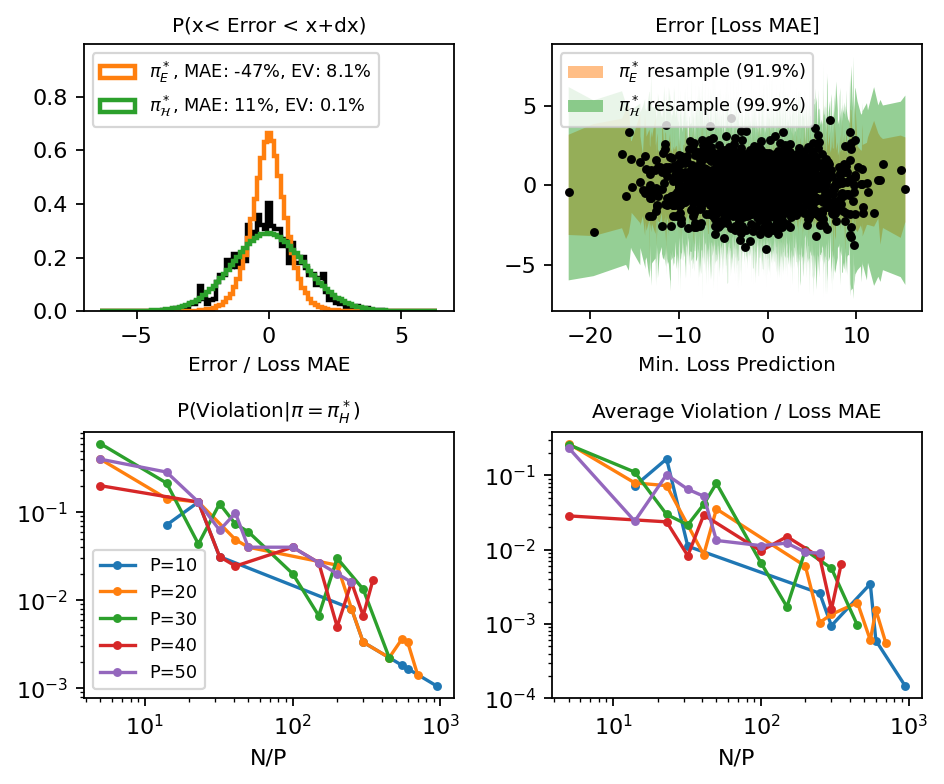

In [5]:
fig,taxs = plt.subplots(2,2,figsize=(6,5),dpi=160)
axs = taxs[0]
PlotModel(res,axs)#f'{mod}Model.png')
#axs[0].set_title("")#Error Histogram",fontsize=9)
#axs[1].set_title("")#Prediction Envelopes",fontsize=9)

axs = taxs[1]
model='cubic'
for P in all_envelopes.keys():
    if P<60:
        ev = all_envelopes[P][:,1]*0.01
        axs[0].plot(all_envelopes[P][ev>0.0,0],ev[ev>0.0],'.-',label=f'P={P}')
        ev = all_envelopes[P][:,2]
        axs[1].plot(all_envelopes[P][ev>1e-4,0],ev[ev>1e-4],'.-',label=f'P={P}')

axs[0].legend(fontsize=8)
for i in range(2):
    axs[i].set_xlabel('N/P')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    #axs[i].set_ylim(0.0001,0.3)
axs[0].set_title(r'P(Violation|$\pi=\pi^*_H$)',fontsize=9)
axs[1].set_title(r'Average Violation / Loss MAE',fontsize=9)
plt.tight_layout()
plt.savefig('EnvelopeViolation-quad.png')
        

In [7]:
def PlotModel(res,axs=None,filename=None):
    if axs is None:
        axs = plt.subplots(1,2,figsize=(6,3),dpi=160)

    N = res['X_TRAIN'].shape[0]
    P = res['X_TRAIN'].shape[1]
    Thetas = res['ALL_POINTWISE_FITS']
    weights = res['ALL_POINTWISE_WEIGHTS']
    weights /= weights.sum()

    Thetas_HC = res['HYPERCUBE_SAMPLES']

    # test MLE predictions and order by prediction
    mle = res['X_TEST']@Thetas.mean(0)
    errors = (res['Y_TEST'] - mle)
    o = mle.argsort()
    
    # reorder
    errors = errors[o]
    X_test = res['X_TEST'][o]
    mle = mle[o]
    y_test = res['Y_TEST'][o]

    # mle errors
    true_mae = np.abs(errors).mean()
    errors /= true_mae
    y_test /= true_mae
    mle /= true_mae
    mae = 1.0
    # histograms
    bins = np.linspace(-1.5,1.5,100) * np.abs(errors).max()

    lim = hist(axs[0],errors,label=None,bins=bins,color='k')
    
    # ensemble ansatz
    all_errors = X_test @ (Thetas.T - Thetas.mean(0)[:,None]) / true_mae
    
    env_pc = envelope(all_errors,errors,'raw')
    N_resample = Thetas.shape[0] * 10
    c='C1'
    ens_select = np.random.choice(Thetas.shape[0],N_resample,\
        replace=True,p=weights)
    
    all_errors = all_errors[:,ens_select]
    all_errors -= all_errors.mean()
    
    env_pc = envelope(all_errors,errors,'Resampled')
    
    lim = max(lim,hist(axs[0],all_errors.flatten(),\
                    label=r'$\pi^*_E$,',env_pc=env_pc,bins=bins,color=c))

    # parameter resampling
    c='C2'
    random_errors = X_test @ (Thetas_HC.T - Thetas.mean(0)[:,None]) / true_mae
    random_errors -= random_errors.mean()

    env_pc = envelope(random_errors,errors,'Random')
    
    lim = max(lim,hist(axs[0],random_errors.flatten(),\
                    label=r'$\pi^*_\mathcal{H}$,',env_pc=env_pc,bins=bins,color=c))


    axs[0].set_ylim(0.0,lim*1.5)
    axs[0].set_title("P(x< Error < x+dx)",fontsize=9)
    axs[0].set_xlabel("Error / Loss MAE",fontsize=9)
    axs[0].legend(loc='upper left',fontsize=8)

MAE raw 4.695459170875288
RMS raw 14.571379711409225
ENV raw 0.22584246438423267
Envelope Violation (raw): 8.1 %
MAE Resampled 1.9229635111865089
RMS Resampled 3.6306061670320924
ENV Resampled 0.22584246438423267
Envelope Violation (Resampled): 8.2 %
MAE Random 0.9239096623672679
RMS Random 0.9025674013743187
ENV Random 0.11758897635504734
Envelope Violation (Random): 0.1 %


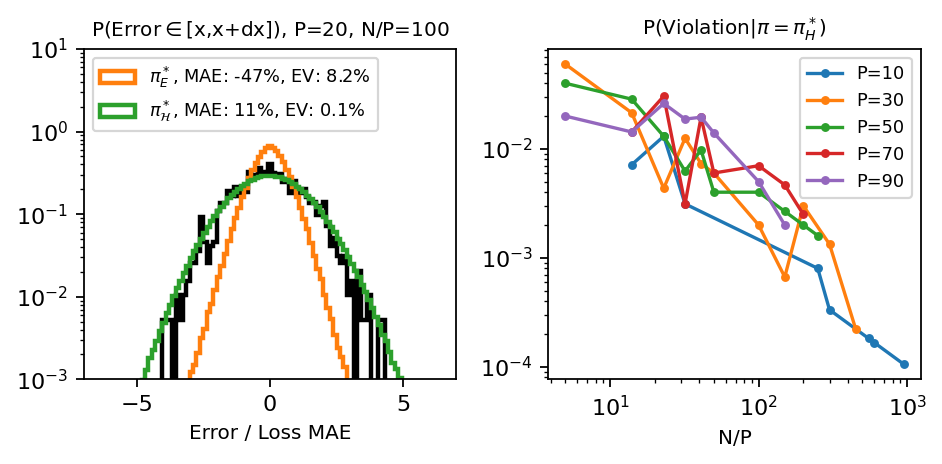

In [18]:
fig,axs = plt.subplots(1,2,figsize=(6,3),dpi=160)
PlotModel(res,axs)#f'{mod}Model.png')

model='cubic'
for P in all_envelopes.keys():
    if (P//10)%2==0:
        continue
    ev = all_envelopes[P][:,1]*0.001
    axs[1].plot(all_envelopes[P][ev>0.0,0],ev[ev>0.0],'.-',label=f'P={P}')
    
axs[1].legend(fontsize=8)
axs[1].set_xlabel('N/P',fontsize=9)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(1.0e-3,10.)
axs[0].set_yscale('log')
axs[0].set_title(r'P(Error$\in$[x,x+dx]), P=20, N/P=100',fontsize=9)

axs[1].set_title(r'P(Violation|$\pi=\pi^*_H$)',fontsize=9)
#axs[1].set_title(r'Average Violation / Loss MAE',fontsize=9)
plt.tight_layout()
plt.savefig('EnvelopeViolation-quad.png')